In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

Image segmentation is the classification of an image into different groups. 
* It is a process of partitioning a digital image into multiple distinct regions containing each pixel/set of pixels with similar atributes. 
* The goal of image segmentation is to alter the representation of an image into something that is meaningful and easier to analyze. 
* We use image segmentation in multiple areas, for example in autonomous vechicles or in medical recognition.

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. \
Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. \
The algorithm then iterates between two steps until stop condition is met:
* Data assigment step - assigning each data point to its nearest centroid based on the quared Euclidean distance
* Centroid update step - recomputing centroids by taking the mean of all data points in given centroid's cluster

Choosing K: K-means clustering can be evaluated using for example Elbow method. The elbow method is used to determine the optimal number of clusters in K-means clustering. It plots the value of the cost function produced by different values of K. However, at the start i am gonna make an analysis of resulting images after consecutive k-steps and how they change after each step so I am not going to calculate optimal K for each case.

In [53]:
def kmeansImg(img, vectorized, criteria, K, attempts=10):
    _, bestLabels, centers = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    bestLabels = bestLabels.flatten()
    centers = np.uint8(centers)
    res = centers[bestLabels.flatten()]
    result_image = res.reshape((img.shape))
    return result_image
    
def process(img_name):
    img = cv2.cvtColor(cv2.imread(img_name), cv2.COLOR_BGR2RGB)
    vectorized = np.float32(img.reshape((-1, 3)))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k_steps = [2, 3, 4, 5, 6, 7, 20]
    segmented = [kmeansImg(img, vectorized, criteria, K=k) for k in k_steps]
    for i, seg_img in enumerate(segmented):
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.subplot(1, 2, 2)
        plt.imshow(seg_img)
        plt.title(f'K={k_steps[i]}')
    plt.show()

Lets start by looking at different types of images and how K-means clustering affects them:

* Starting from picture of 2d character with few colors:

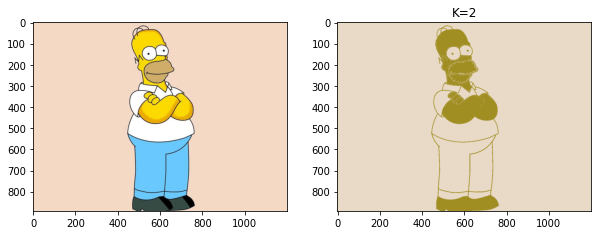

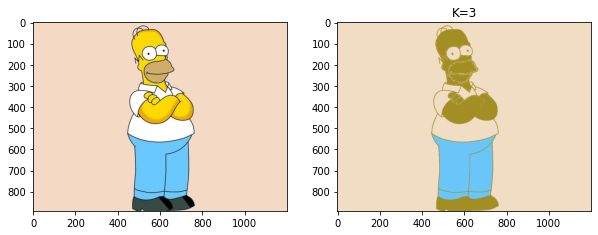

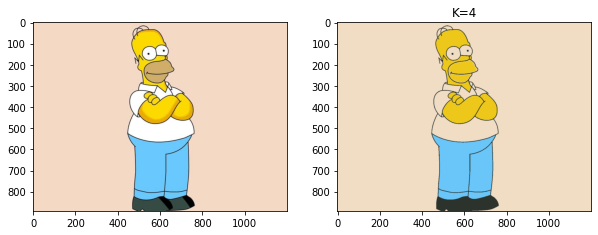

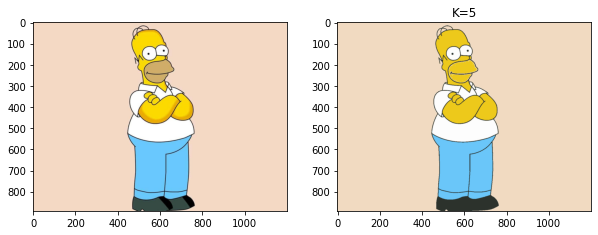

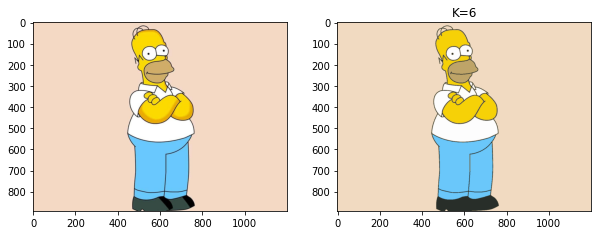

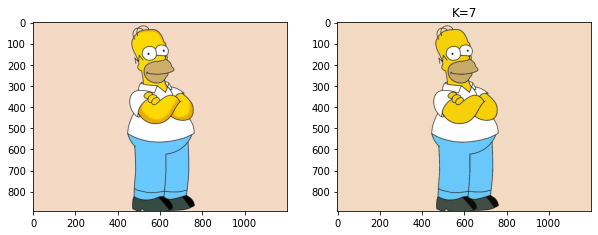

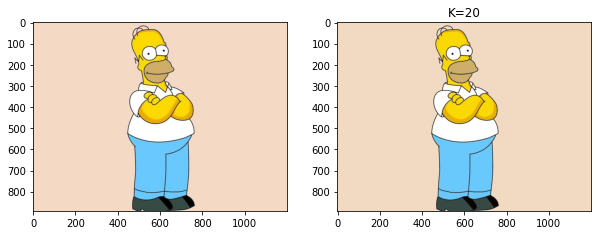

In [54]:
process('Homer.jpg')

It looks like a process of creating a cartoon character. As k increses - each new part of character gets its color. At around k=7 the picture is almost identical as original - mostly because the picture contains few colors so there are big parts of image that falls under one clusters.

* vibrant colored alley of buildings:

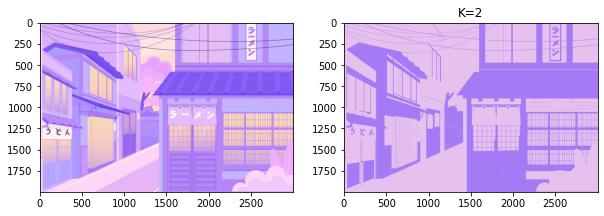

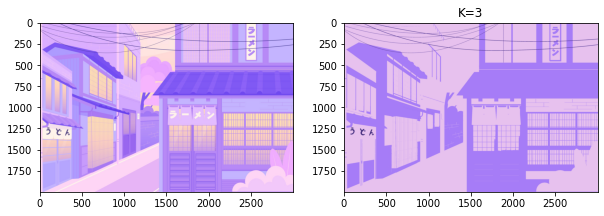

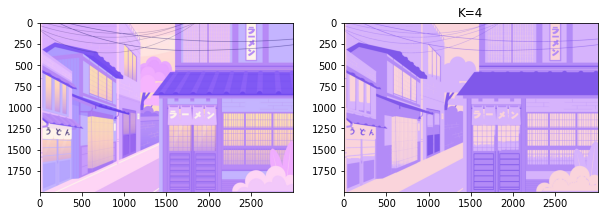

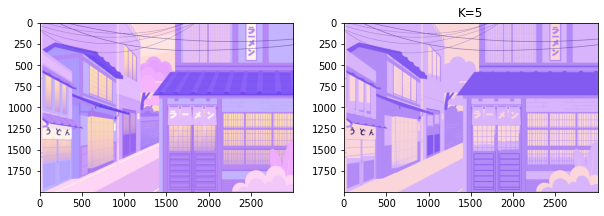

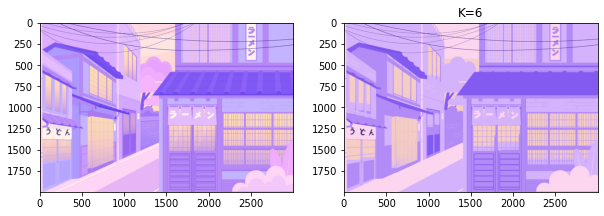

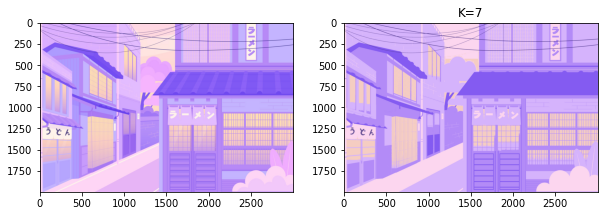

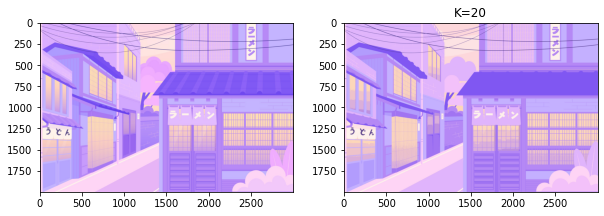

In [55]:
process('alley.jpg')

Similar results to previous image. After each k - the picture gets more detailed and receives more colors.

* a  gray picture of animal

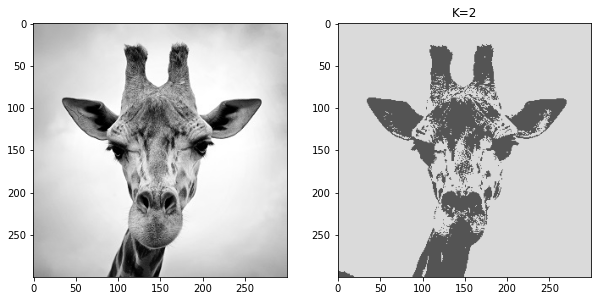

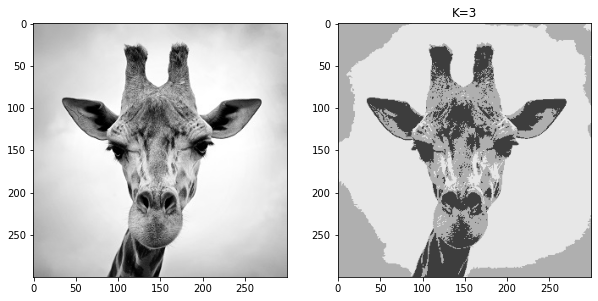

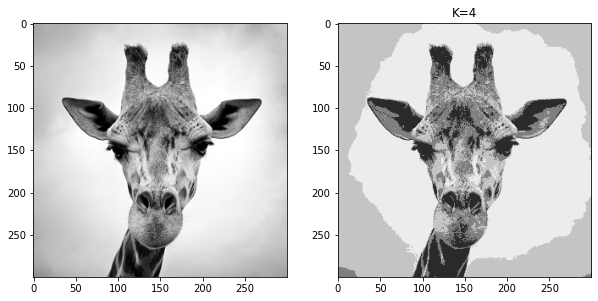

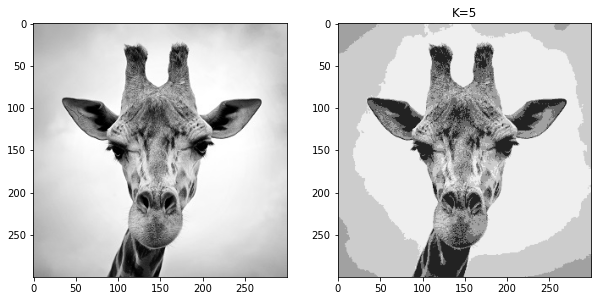

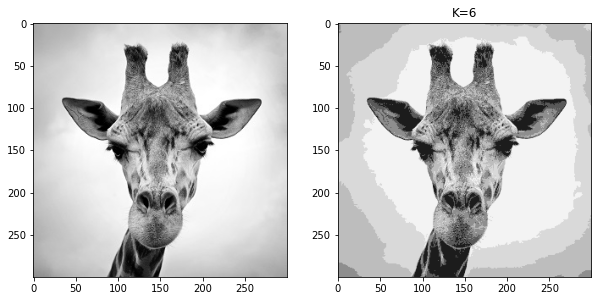

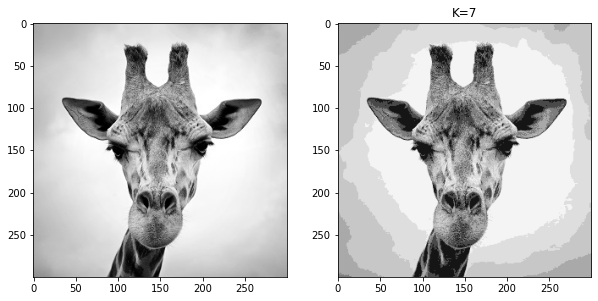

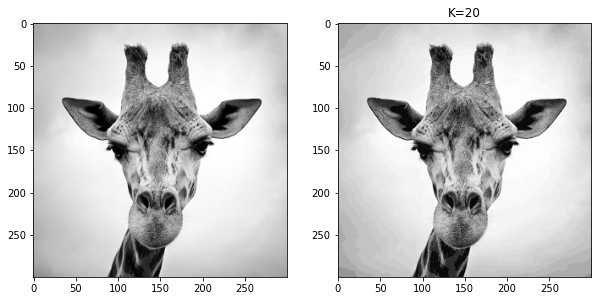

In [56]:
process('giraffe.jpg')

Interesting is that the picture gets more and more depth at the begginer k-steps and the picture still seems complete at around k=7 despite having way more distinct and small details. 

* a colorful photo of landscape

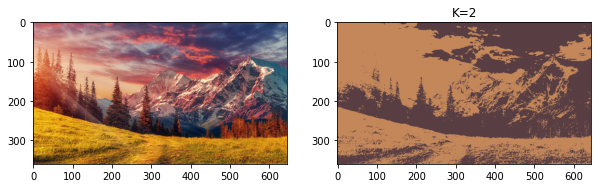

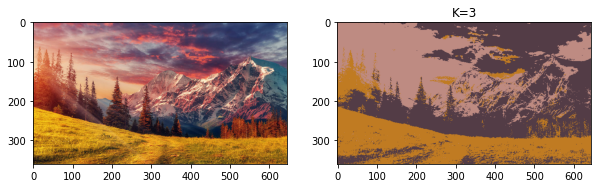

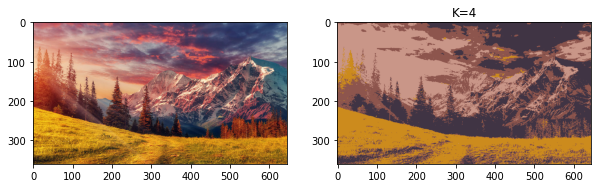

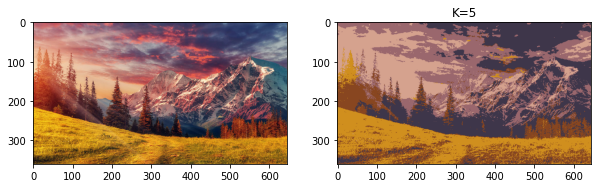

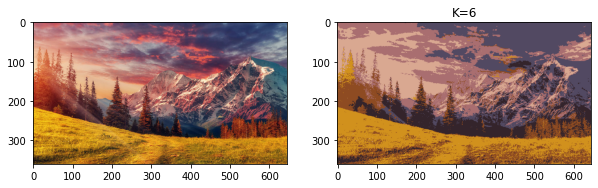

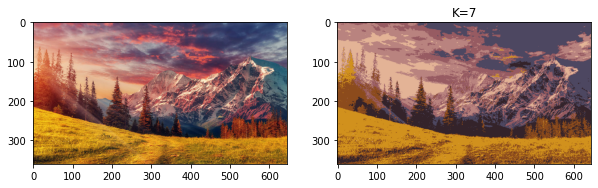

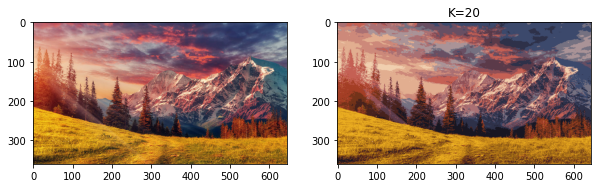

In [57]:
process('landscape.jpg')

Lastly, it seems that to get close to high detailed and colorful picture the algorithm needs way highter k value. At K=20 it still looks incomplete - more like a painting.

In [58]:
def edgesImg(img_name):
    img = cv2.cvtColor(cv2.imread(img_name), cv2.COLOR_BGR2RGB)
    edges = cv2.Canny(img, 200, 200)
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.show()

cv2 library allows us also to quickly see the edges of certain images. It is a useful technique in medical field.

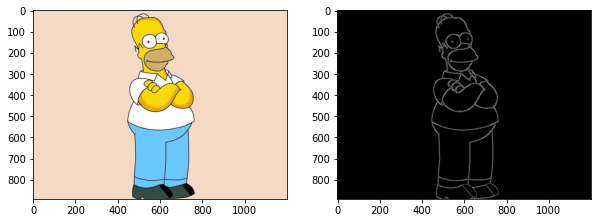

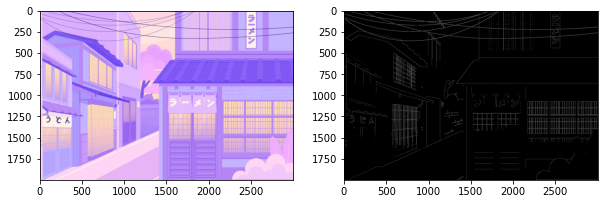

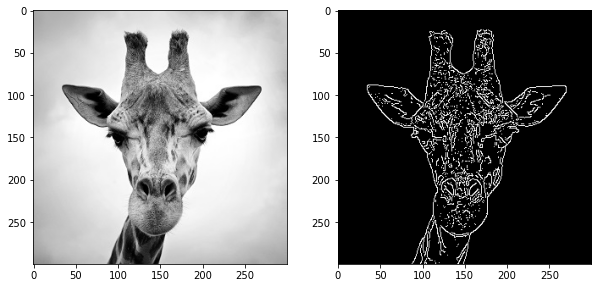

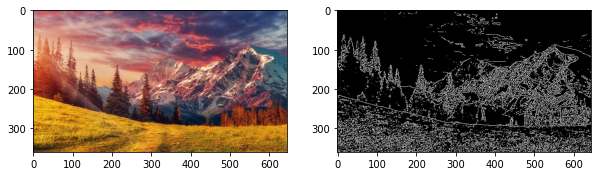

In [59]:
edgesImg('Homer.jpg')
edgesImg('alley.jpg')
edgesImg('giraffe.jpg')
edgesImg('landscape.jpg')

As we can see. Simple images have much better edges image. However, in detailed images it allows us to see certain/overall characteristics of an image so it allows us to compare specific charasteristis of similar images.